(1, 10932)
(1, 2333)
(1, 249)
(1, 41)
(1, 1280)


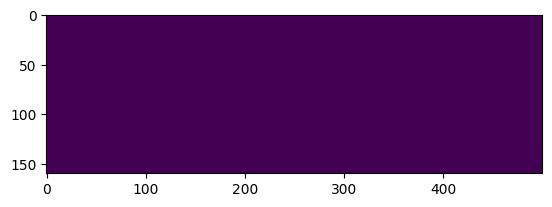

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Load the model.
model = hub.load('https://www.kaggle.com/models/google/bird-vocalization-classifier/TensorFlow2/bird-vocalization-classifier/8')

In [30]:
import pandas as pd
import os
import librosa
DATA_PATH: str = "birdclef-2025"

train_df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
train_df["filepath"] = DATA_PATH + "/train_audio/" + train_df["filename"]

train_df.head()


,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license,filepath
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1139490/CSA36385.ogg
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1139490/CSA36389.ogg
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1192948/CSA36358.ogg
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1192948/CSA36366.ogg
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1192948/CSA36373.ogg


In [28]:
train_df["collection"].unique()

array(['CSA', 'XC', 'iNat'], dtype=object)

In [31]:
train_df

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license,filepath
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1139490/CSA36385.ogg
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1139490/CSA36389.ogg
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1192948/CSA36358.ogg
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1192948/CSA36366.ogg
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1192948/CSA36373.ogg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28559,ywcpar,[''],[''],ywcpar/iNat77392.ogg,iNat,0.0,https://static.inaturalist.org/sounds/77392.m4a,7.6921,-80.3379,Amazona ochrocephala,Yellow-crowned Parrot,Yennifer Alfaro,cc-by-nc 4.0,birdclef-2025/train_audio/ywcpar/iNat77392.ogg
28560,ywcpar,[''],[''],ywcpar/iNat78624.ogg,iNat,0.0,https://static.inaturalist.org/sounds/78624.wav,8.9918,-79.4877,Amazona ochrocephala,Yellow-crowned Parrot,Evan Centanni,cc-by-nc-sa 4.0,birdclef-2025/train_audio/ywcpar/iNat78624.ogg
28561,ywcpar,[''],[''],ywcpar/iNat789234.ogg,iNat,0.0,https://static.inaturalist.org/sounds/789234.wav,9.2316,-70.2041,Amazona ochrocephala,Yellow-crowned Parrot,Henrry,cc-by 4.0,birdclef-2025/train_audio/ywcpar/iNat789234.ogg
28562,ywcpar,[''],[''],ywcpar/iNat819873.ogg,iNat,0.0,https://static.inaturalist.org/sounds/819873.mp3,10.5838,-66.8545,Amazona ochrocephala,Yellow-crowned Parrot,Alejandro Luy,cc-by-nc 4.0,birdclef-2025/train_audio/ywcpar/iNat819873.ogg


In [40]:
train_df[train_df["collection"] == "XC"]
train_df.iloc[[7,8,9,10]]

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license,filepath
7,1194042,[''],[''],1194042/CSA18794.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,5.7892,-73.5504,Copiphora colombiae,Copiphora colombiae,Orlando Acevedo-Charry,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1194042/CSA18794.ogg
8,1194042,[''],[''],1194042/CSA18802.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,5.7892,-73.5504,Copiphora colombiae,Copiphora colombiae,Orlando Acevedo-Charry,cc-by-nc-sa 4.0,birdclef-2025/train_audio/1194042/CSA18802.ogg
9,126247,"['65448', '22976', '476538']",['advertisement call'],126247/XC941297.ogg,XC,3.5,https://xeno-canto.org/941297,9.0465,-79.3024,Leptodactylus insularum,Spotted Foam-nest Frog,Chris Harrison,cc-by-nc-sa 4.0,birdclef-2025/train_audio/126247/XC941297.ogg
10,126247,[''],[''],126247/iNat1109254.ogg,iNat,0.0,https://static.inaturalist.org/sounds/1109254.wav,9.0465,-79.3024,Leptodactylus insularum,Spotted Foam-nest Frog,Chris Harrison,cc-by-nc 4.0,birdclef-2025/train_audio/126247/iNat1109254.ogg


[-3.9173092e-06 -5.2739841e-05  8.5163720e-06 ...  1.0539840e-01
 -9.1084346e-02 -1.3293724e-01]
(3, 160000)
(3, 10932)
(3, 2333)
(3, 249)
(3, 41)
3319
510
1813


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 3 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

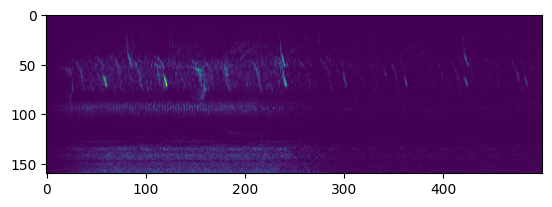

In [41]:
# waveform = np.zeros(5 * 32000, dtype=np.float32)
waveform, sr = librosa.load(train_df.iloc[9]["filepath"], sr=32000)
waveform = waveform.astype(np.float32) 
print(waveform)
# Reshape the waveform to include a batch dimension.
waveform_batch = np.expand_dims(waveform[:5 * 32000], axis=0)
waveform_batch = np.array([waveform[:5 * 32000], waveform[5 * 32000 : 10 * 32000], waveform[10 * 32000 : 15 * 32000]])
print(waveform_batch.shape)
# Run the model, check the output.
model_outputs = model.infer_tf(waveform_batch)

# Examine the spectrogram.
plt.imshow(model_outputs['frontend'][0].T)

# Examine various logits.
print(model_outputs['label'].shape)
print(model_outputs['genus'].shape)
print(model_outputs['family'].shape)
print(model_outputs['order'].shape)

print(np.argmax(model_outputs['label'][0]))
print(np.argmax(model_outputs['label'][1]))
print(np.argmax(model_outputs['label'][2]))
print(np.argmax(model_outputs['label'][3]))
# Examine the embeddings.
print(model_outputs['embedding'].shape)